In [1]:
def count_attacks(state):
    n = len(state)
    attacks = 0

    # Convert state string to a list of integers (column positions of the queens)
    state = [int(c) for c in state]

    # Check for column attacks and diagonal attacks
    for i in range(n):
        for j in range(i + 1, n):
            # Check for column attacks (queens in the same column)
            if state[i] == state[j]:
                attacks += 1
            # Check for diagonal attacks (queens in the same diagonal)
            elif abs(state[i] - state[j]) == abs(i - j):
                attacks += 1

    return attacks

# Example usage
state = "07312143"
attacks = count_attacks(state)
print(f"Number of attacking pairs: {attacks}")


Number of attacking pairs: 8


In [17]:
def count_attacks(state):
    n = len(state)
    attacks = 0
    attacking_pairs = []

    # Convert state string to a list of integers (column positions of the queens)
    state = [int(c) for c in state]

    # Check for column attacks and diagonal attacks
    for i in range(n):
        for j in range(i + 1, n):
            # Check for column attacks (queens in the same column)
            if state[i] == state[j]:
                attacks += 1
                attacking_pairs.append((i + 1, state[i], j + 1, state[j]))  # (row1, col1, row2, col2)
            # Check for diagonal attacks (queens in the same diagonal)
            elif abs(state[i] - state[j]) == abs(i - j):
                attacks += 1
                attacking_pairs.append((i + 1, state[i], j + 1, state[j]))  # (row1, col1, row2, col2)

    return attacks, attacking_pairs

# Example usage
state = "24752411"
attacks, attacking_pairs = count_attacks(state)
print(f"Number of attacking pairs: {attacks}")
print("Attacking pairs (row1, col1) -> (row2, col2):")
for pair in attacking_pairs:
    print(pair)


Number of attacking pairs: 6
Attacking pairs (row1, col1) -> (row2, col2):
(1, 2, 4, 5)
(1, 2, 5, 2)
(2, 4, 6, 4)
(3, 7, 6, 4)
(4, 5, 8, 1)
(7, 1, 8, 1)


Number of attacking pairs: 8
Attacking pairs (row1, col1) -> (row2, col2):
(2, 2, 7, 2)
(3, 0, 4, 1)
(3, 0, 5, 0)
(3, 0, 6, 3)
(4, 1, 5, 0)
(4, 1, 6, 3)
(5, 0, 7, 2)
(6, 3, 7, 2)


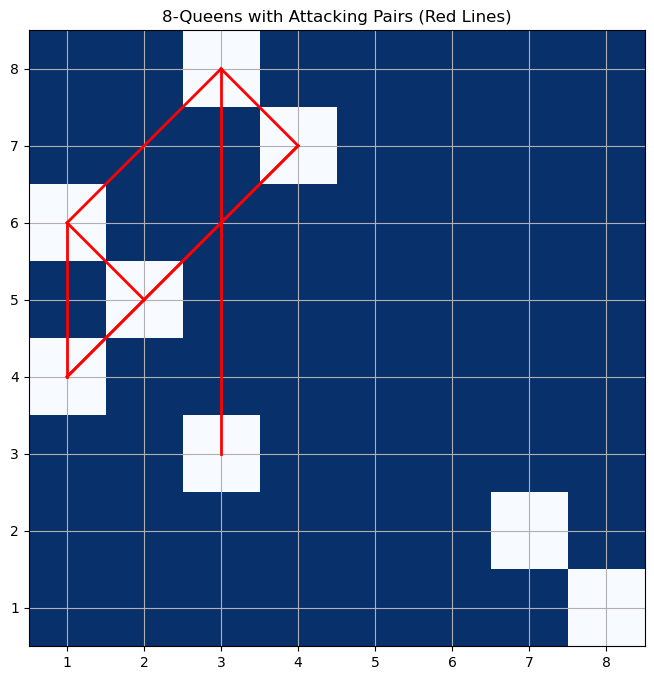

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def count_attacks(state):
    n = len(state)
    attacks = 0
    attacking_pairs = []

    # Convert state string to a list of integers (column positions of the queens)
    state = [int(c) for c in state]

    # Check for column attacks and diagonal attacks
    for i in range(n):
        for j in range(i + 1, n):
            # Check for column attacks (queens in the same column)
            if state[i] == state[j]:
                attacks += 1
                attacking_pairs.append((i, state[i] - 1, j, state[j] - 1))  # (row1, col1, row2, col2)
            # Check for diagonal attacks (queens in the same diagonal)
            elif abs(state[i] - state[j]) == abs(i - j):
                attacks += 1
                attacking_pairs.append((i, state[i] - 1, j, state[j] - 1))  # (row1, col1, row2, col2)

    return attacks, attacking_pairs

def plot_board(state, attacking_pairs):
    n = len(state)
    board = np.full((n, n), '.', dtype=str)  # Create a n x n board filled with '.'

    # Place queens on the board
    for i in range(n):
        board[i, state[i] - 1] = 'Q'

    # Plot the board using matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(board == '.', cmap='Blues', interpolation='nearest')

    # Plot attacking pairs with lines
    for pair in attacking_pairs:
        row1, col1, row2, col2 = pair
        plt.plot([col1, col2], [row1, row2], 'r-', lw=2)

    # Set grid and labels
    plt.xticks(range(n), [str(i + 1) for i in range(n)])
    plt.yticks(range(n), [str(i + 1) for i in range(n)])
    plt.grid(True)
    plt.title("8-Queens with Attacking Pairs (Red Lines)")

    # Display the board
    plt.gca().invert_yaxis()
    plt.show()

# Example usage
state = "07312143"
attacks, attacking_pairs = count_attacks(state)
print(f"Number of attacking pairs: {attacks}")
print("Attacking pairs (row1, col1) -> (row2, col2):")
for pair in attacking_pairs:
    print(pair)

# Plot the board with attacking pairs
plot_board([int(c) for c in state], attacking_pairs)


In [26]:
import random

def create_matrix(n):
    m = []
    for i in range(n):
        c = []
        for j in range(n):
            c.append(0)
        m.append(c)
    return m

def print_matrix(m):
    for i in range(len(m)):
        print(m[i])

def place_queens(matrix, num_queens):
    n = len(matrix)
    queens = 1
    while queens <= num_queens:
        i = random.randint(0, n - 1)
        j = random.randint(0, n - 1)
        # Check if the cell is empty
        if matrix[i][j] == 0:
            matrix[i][j] = 1
            queens += 1
    return matrix
def calculate_fitness(matrix):
    n = len(matrix)
    fitness = 0
    queen_positions = []

    # Get the positions of the queens
    for i in range(n):
        for j in range(n):
            if matrix[i][j] == 1:
                queen_positions.append((i, j))

    print(queen_positions)

    # Calculate total pairs (combination of 2 queens)
    total_pairs = len(queen_positions) * (len(queen_positions) - 1) // 2
    print(f"Total pairs: {total_pairs}")

    # Count attacking pairs
    attacking_pairs = 0
    for q1 in range(len(queen_positions)):
        for q2 in range(q1 + 1, len(queen_positions)):
            x1, y1 = queen_positions[q1]
            x2, y2 = queen_positions[q2]

            # Check if queens are in the same row, column or diagonal
            if x1 == x2 or y1 == y2 or abs(x1 - x2) == abs(y1 - y2):
                attacking_pairs += 1

    print(f"Attacking pairs: {attacking_pairs}")

    # Fitness is the number of non-attacking pairs (maximize fitness)
    fitness = total_pairs - attacking_pairs
    return fitness

# Main Execution
n = 8  # Size of the board
num_queens = n  # Number of queens to place

matrix = create_matrix(n)
matrix = place_queens(matrix, num_queens)

print("Initial Matrix with Queens placed:")
print_matrix(matrix)

fitness = calculate_fitness(matrix)
print(f"Fitness Value: {fitness}")

def get_string_state(matrix):
    state = []
    for row in matrix:
        if 1 in row:
            # Find the column index where the queen (1) is placed
            state.append(str(row.index(1)))
        else:
            # No queen in this row, use '-' as a placeholder
            state.append('-')
    return ''.join(state)

# Print the string state
string_state = get_string_state(matrix)
print(f"String State of the Board: {string_state}")


Initial Matrix with Queens placed:
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[(0, 5), (2, 6), (4, 0), (5, 1), (5, 4), (5, 5), (6, 4), (6, 6)]
Total pairs: 28
Attacking pairs: 10
Fitness Value: 18
String State of the Board: 5-6-014-


In [10]:
import random

def create_matrix(n):
    m = []
    for i in range(n):
        c = []
        for j in range(n):
            c.append(0)
        m.append(c)
    return m

def print_matrix(m):
    for i in range(len(m)):
        print(m[i])
adj_matrix=create_matrix(8)
print_matrix(adj_matrix)
print(len(adj_matrix))



[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
8


In [21]:
n=6
i = random.randint(0, n - 1)
print(i)

4


In [51]:
import random

def create_matrix(n):
    """Creates an n x n matrix initialized with 0s (empty board)."""
    m = []
    for i in range(n):
        c = []
        for j in range(n):
            c.append(0)
        m.append(c)
    return m

def print_matrix(m):
    """Prints the matrix (board) in a readable format."""
    for i in range(len(m)):
        print(m[i])

def place_queens(matrix, num_queens):
    """Places the specified number of queens randomly on the board."""
    n = len(matrix)
    queens_placed = 0
    
    # Randomly place queens on the board with at most one queen per column.
    columns = random.sample(range(n), num_queens)  # Randomly shuffle columns
    for col in columns:
        row = random.randint(0, n - 1)  # Random row for the queen
        matrix[row][col] = 1
        queens_placed += 1
    
    return matrix

def calculate_fitness(matrix):
    """Calculates the fitness value based on the number of attacking queen pairs."""
    n = len(matrix)
    fitness = 0
    queen_positions = []

    # Get the positions of the queens
    for i in range(n):
        for j in range(n):
            if matrix[i][j] == 1:
                queen_positions.append((i, j))

    print(queen_positions)

    # Calculate total pairs (combination of 2 queens)
    total_pairs = len(queen_positions) * (len(queen_positions) - 1) // 2
    print(f"Total pairs: {total_pairs}")

    # Count attacking pairs
    attacking_pairs = 0
    for q1 in range(len(queen_positions)):
        for q2 in range(q1 + 1, len(queen_positions)):
            x1, y1 = queen_positions[q1]
            x2, y2 = queen_positions[q2]

            # Check if queens are in the same row, column, or diagonal
            if x1 == x2 or y1 == y2 or abs(x1 - x2) == abs(y1 - y2):
                attacking_pairs += 1

    print(f"Attacking pairs: {attacking_pairs}")

    # Fitness is the number of non-attacking pairs (maximize fitness)
    fitness = total_pairs - attacking_pairs
    return fitness

def get_string_state(matrix):
    """Returns the string representation of the board state (bottom-to-top)."""
    n = len(matrix)
    state = []
    
    # Iterate through each column
    for col in range(n):
        for row in range(n-1, -1, -1):  # Start from the bottom row to the top row
            if matrix[row][col] == 1:
                state.append(n - row)  # Convert to 1-based index from bottom to top
                break  # Break as we found the queen in this column
    
    return state  # Return the list of rows with queens

# Main Execution
n = 8  # Size of the board
num_queens = 8  # Number of queens to place (it could be less than n)

matrix = create_matrix(n)
matrix = place_queens(matrix, num_queens)

print("Initial Matrix with Queens placed:")
print_matrix(matrix)

fitness = calculate_fitness(matrix)
print(f"Fitness Value: {fitness}")

# Print the string state
string_state = get_string_state(matrix)
print(f"String State of the Board: {string_state}")


Initial Matrix with Queens placed:
[0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 0, 0]
[(0, 7), (1, 4), (1, 5), (2, 6), (4, 1), (5, 2), (7, 0), (7, 3)]
Total pairs: 28
Attacking pairs: 8
Fitness Value: 20
String State of the Board: [1, 4, 3, 1, 7, 7, 6, 8]


In [47]:
def create_matrix(n):
    """Creates an n x n matrix initialized with 0s (empty board)."""
    m = []
    for i in range(n):
        c = []
        for j in range(n):
            c.append(0)
        m.append(c)
    return m

def list_to_board(queen_rows, n):
    """Converts a list of queen row positions to a board matrix (bottom-to-top)."""
    matrix = create_matrix(n)
    
    # Place queens on the board based on the row positions for each column
    for col in range(n):
        row = queen_rows[col]  # This is 1-based index for bottom-to-top
        if row > 0:  # Only place a queen if the row number is valid (greater than 0)
            matrix[n - row][col] = 1  # Convert to 0-based index for matrix (bottom-to-top)(7,0)
    
    return matrix

def print_matrix(m):
    """Prints the matrix (board) in a readable format."""
    for row in m:
        print(row)

# Example usage
queen_rows = [8, 2, 4, 1, 8, 8, 6, 1]  # Row positions of queens for each column (bottom-to-top)
n = 8  # Board size is 8x8

# Convert list to board matrix using bottom-to-top indexing
board = list_to_board(queen_rows, n)

# Print the board
print("Converted Board:")
print_matrix(board)


Converted Board:
[1, 0, 0, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 1]


In [ ]:
import random

def random_chromosome(size): #making random chromosomes 
    return [ random.randint(1, nq) for _ in range(nq) ]

def fitness(chromosome):
    horizontal_collisions = sum([chromosome.count(queen)-1 for queen in chromosome])/2
    diagonal_collisions = 0

    n = len(chromosome)
    left_diagonal = [0] * 2*n
    right_diagonal = [0] * 2*n
    for i in range(n):
        left_diagonal[i + chromosome[i] - 1] += 1
        right_diagonal[len(chromosome) - i + chromosome[i] - 2] += 1

    diagonal_collisions = 0
    for i in range(2*n-1):
        counter = 0
        if left_diagonal[i] > 1:
            counter += left_diagonal[i]-1
        if right_diagonal[i] > 1:
            counter += right_diagonal[i]-1
        diagonal_collisions += counter / (n-abs(i-n+1))
    
    return int(maxFitness - (horizontal_collisions + diagonal_collisions)) #28-(2+3)=23

def probability(chromosome, fitness):
    return fitness(chromosome) / maxFitness

def random_pick(population, probabilities):
    populationWithProbabilty = zip(population, probabilities)
    total = sum(w for c, w in populationWithProbabilty)
    r = random.uniform(0, total)
    upto = 0
    for c, w in zip(population, probabilities):
        if upto + w >= r:
            return c
        upto += w
    assert False, "Shouldn't get here"
        
def reproduce(x, y): #doing cross_over between two chromosomes
    n = len(x)
    c = random.randint(0, n - 1)
    return x[0:c] + y[c:n]

def mutate(x):  #randomly changing the value of a random index of a chromosome
    n = len(x)
    c = random.randint(0, n - 1)
    m = random.randint(1, n)
    x[c] = m
    return x

def genetic_queen(population, fitness):
    mutation_probability = 0.03
    new_population = []
    probabilities = [probability(n, fitness) for n in population]
    for i in range(len(population)):
        x = random_pick(population, probabilities) #best chromosome 1
        y = random_pick(population, probabilities) #best chromosome 2
        child = reproduce(x, y) #creating two new chromosomes from the best 2 chromosomes
        if random.random() < mutation_probability:
            child = mutate(child)
        print_chromosome(child)
        new_population.append(child)
        if fitness(child) == maxFitness: break
    return new_population

def print_chromosome(chrom):
    print("Chromosome = {},  Fitness = {}"
        .format(str(chrom), fitness(chrom)))

if __name__ == "__main__":
    nq = int(input("Enter Number of Queens: ")) #say N = 8
    maxFitness = (nq*(nq-1))/2  # 8*7/2 = 28
    population = [random_chromosome(nq) for _ in range(100)]
    
    generation = 1

    while not maxFitness in [fitness(chrom) for chrom in population]:
        print("=== Generation {} ===".format(generation))
        population = genetic_queen(population, fitness)
        print("")
        print("Maximum Fitness = {}".format(max([fitness(n) for n in population])))
        generation += 1
    chrom_out = []
    print("Solved in Generation {}!".format(generation-1))
    for chrom in population:
        if fitness(chrom) == maxFitness:
            print("")
            print("One of the solutions: ")
            chrom_out = chrom
            print_chromosome(chrom)
            
    board = []

    for x in range(nq):
        board.append(["x"] * nq)
        
    for i in range(nq):
        board[nq-chrom_out[i]][i]="Q"
            

    def print_board(board):
        for row in board:
            print (" ".join(row))
            
    print()
    print_board(board)

In [ ]:
#by sir 
import random
def createCromosome(n):
    c=''
    for i in range(n):
        c+=str(random.randint(0,n-1))
    return c

def find_attack(chromosome):
    n=len(chromosome)
    attack=0
    for i in range(n):
        for j in range(i+1,n):
            if chromosome[i]==chromosome[j]:
                attack+=1
            elif abs(int(chromosome[i])-int(chromosome[j]))==abs(i-j):
                attack+=1
    return attack

def createBoard(c1):
    m=[]
    n=len(c1)
    for i in range(n):
        c=[]
        for j in range(n):
            c.append(0)
        m.append(c)
        
    for i in range(n):
        m[i][int(c1[i])]=1
    return m

def printBoard(m):
    for row in m:
        print(row)

n=5
c1=createCromosome(n)
print(c1)

m=createBoard(c1)
printBoard(m)

attack1=find_attack(c1)
print(attack1)





In [ ]:
### by me
def createb(n,c1):
    m = []
    for i in range(n):  # Loop from 0 to n-1
        c = []
        for j in range(n):  # Loop from 0 to n-1
            c.append(0)  # Append 0 to the inner list
        m.append(c)  # Append the inner list to the outer list
    return m

def print_matrix(m):
    """Prints the matrix (board) in a readable format."""
    for row in m:
        print(row)

m = createb(n, c1)
print_matrix(m)

In [ ]:
import random

def createCh(n):
    """Creates a random configuration of queens."""
    return ''.join(str(random.randint(0, n - 1)) for _ in range(n))

def findat(ch):
    """Calculates the number of attacking pairs (row and diagonal)."""
    attack = 0
    for i in range(len(ch)):
        for j in range(i + 1, len(ch)):
            if ch[i] == ch[j] or abs(int(ch[i]) - int(ch[j])) == abs(i - j):
                attack += 1
    return attack

def calculate_fitness(n, attack_count):
    """Calculates the fitness of the configuration."""
    total_pairs = n * (n - 1) // 2
    return total_pairs - attack_count

def population(n, pop_size):
    """Generates a population of configurations and calculates their properties."""
    configs = []
    for _ in range(pop_size):
        config = createCh(n)
        attack_count = findat(config)
        fitness = calculate_fitness(n, attack_count)
        configs.append((config, attack_count, fitness))
    return configs

# Example usage
n = 8  # Number of queens
pop_size = 5  # Number of configurations to generate

configs = population(n, pop_size)
for i, (config, attack_count, fitness) in enumerate(configs, 1):
    print(f"Configuration {i}: {config}")
    print(f"  Attacking Pairs: {attack_count}")
    print(f"  Fitness Value: {fitness}")


In [3]:
###by me
import random

def createCh(n):
    """Creates a random configuration of queens."""
    c = ''
    for i in range(n):
        c += str(random.randint(0, n - 1))
    return c

def findat(ch):
    """Calculates the number of attacking pairs row and diagonal."""
    n = len(ch)
    attack = 0
    for i in range(len(ch)):
        for j in range(i + 1, n):
            if ch[i] == ch[j]:
                attack += 1
            elif abs(int(ch[i]) - int(ch[j])) == abs(i - j):
                attack += 1
    return attack

def createb(n,c1):
    m = []
    for i in range(n):  # Loop from 0 to n-1
        c = []
        for j in range(n):  # Loop from 0 to n-1
            c.append(0)  # Append 0 to the inner list
        m.append(c)  # Append the inner list to the outer list
    
    for i in range(n):
        m[i][int(c1[i])] = 1  # Place queens on the board
    return m
def print_matrix(m):
    """Prints the matrix (board) in a readable format."""
    for row in m:
        print(row)

def calculate_fitness(matrix, attack_count):
    """Calculates the fitness of the configuration."""
    n = len(matrix)
    queen_positions = []

    # Get the positions of the queens
    for i in range(n):
        for j in range(n):
            if matrix[i][j] == 1:
                queen_positions.append((i, j))

    # Calculate total pairs (combination of 2 queens)
    total_pairs = len(queen_positions) * (len(queen_positions) - 1) // 2

    # Fitness is the number of non-attacking pairs (maximize fitness)
    fitness = total_pairs - attack_count

    return fitness

# Define number of queens
n = 8

# Generate a random configuration
c1 = createCh(n)
print("Generated Configuration:", c1)

# Calculate attacking pairs
attack1 = findat(c1)
print("Attacking pairs:", attack1)

# Create the board matrix
print("Board Matrix:")
m = createb(n, c1)
print_matrix(m)

# Calculate fitness value
fitness = calculate_fitness(m, attack1)
print(f"Fitness Value: {fitness}")


Generated Configuration: 32711767
Attacking pairs: 7
Board Matrix:
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1]
Fitness Value: 21
